# Case Study 2
# Vishal Khurana(40185304)

# 1) Importing Libaries

In [1]:
!pip install prophet


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_whiskyy = pd.read_csv('Whisky.csv')
df_whitewine = pd.read_csv('Whitewine.csv')
df_craftbeer = pd.read_csv('CraftBeer.csv')

# 2) Data Cleaning

In [4]:
df_whiskyy.head()

,Year,Month,Relative Interest
0,2010,1,41
1,2010,2,42
2,2010,3,44
3,2010,4,41
4,2010,5,39


In [5]:
df_whitewine.head()

,Year,Month,Relative Interest
0,2010,1,54
1,2010,2,54
2,2010,3,58
3,2010,4,52
4,2010,5,61


In [6]:
df_craftbeer.head()

,Year,Month,Relative Interest
0,2010,1,6
1,2010,2,9
2,2010,3,15
3,2010,4,12
4,2010,5,17


In [7]:
df_whiskyy['Date'] = pd.to_datetime(df_whiskyy[['Year', 'Month']].assign(DAY=1))

In [8]:
df_whiskyy

,Year,Month,Relative Interest,Date
0,2010,1,41,2010-01-01
1,2010,2,42,2010-02-01
2,2010,3,44,2010-03-01
3,2010,4,41,2010-04-01
4,2010,5,39,2010-05-01
...,...,...,...,...
67,2015,8,69,2015-08-01
68,2015,9,63,2015-09-01
69,2015,10,65,2015-10-01
70,2015,11,87,2015-11-01


In [9]:
df_whiskyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               72 non-null     int64         
 1   Month              72 non-null     int64         
 2   Relative Interest  72 non-null     int64         
 3   Date               72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.4 KB


In [10]:
df_whiskyy.set_index('Date',inplace=True)

In [11]:
df_whiskyy

,Year,Month,Relative Interest
Date,,,
2010-01-01,2010,1,41
2010-02-01,2010,2,42
2010-03-01,2010,3,44
2010-04-01,2010,4,41
2010-05-01,2010,5,39
...,...,...,...
2015-08-01,2015,8,69
2015-09-01,2015,9,63
2015-10-01,2015,10,65


In [12]:
df_whiskyy.drop(['Year','Month'], axis=1, inplace= True)

In [13]:
df_whiskyy

,Relative Interest
Date,
2010-01-01,41
2010-02-01,42
2010-03-01,44
2010-04-01,41
2010-05-01,39
...,...
2015-08-01,69
2015-09-01,63
2015-10-01,65


In [14]:
df_whiskyy.isnull().sum()

Relative Interest    0
dtype: int64

In [15]:
df_whiskyy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2010-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Relative Interest  72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


In [16]:
df_whitewine['Date'] = pd.to_datetime(df_whitewine[['Year', 'Month']].assign(DAY=1))

In [17]:
df_whitewine.set_index('Date',inplace=True)

In [18]:
df_whitewine.drop(['Year','Month'], axis=1, inplace= True)

In [19]:
df_whitewine

,Relative Interest
Date,
2010-01-01,54
2010-02-01,54
2010-03-01,58
2010-04-01,52
2010-05-01,61
...,...
2015-08-01,81
2015-09-01,72
2015-10-01,70


In [20]:
df_craftbeer['Date'] = pd.to_datetime(df_craftbeer[['Year', 'Month']].assign(DAY=1))
df_craftbeer.set_index('Date',inplace=True)
df_craftbeer.drop(['Year','Month'], axis=1, inplace= True)
df_craftbeer

,Relative Interest
Date,
2010-01-01,6
2010-02-01,9
2010-03-01,15
2010-04-01,12
2010-05-01,17
...,...
2015-08-01,84
2015-09-01,75
2015-10-01,66


# 3) Plotting graph for Whisky, Whitewine and Craft Beer Data

<AxesSubplot:xlabel='Date'>

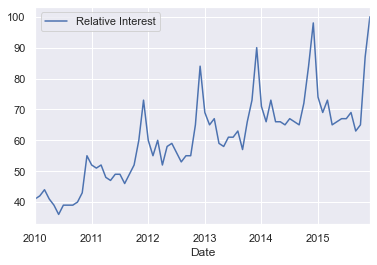

In [21]:
## Ploting graph of all data
df_whiskyy.plot()
## It shows a seasonal data

<AxesSubplot:xlabel='Date'>

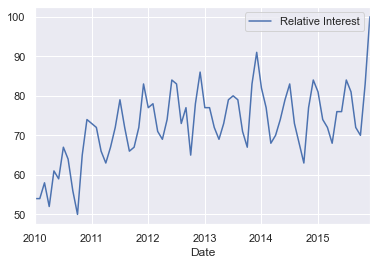

In [22]:
df_whitewine.plot()

<AxesSubplot:xlabel='Date'>

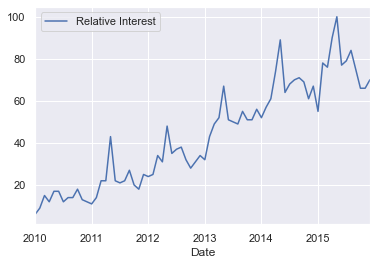

In [23]:
df_craftbeer.plot()

# 4) Whisky Analysis

In [24]:
df_whiskyy

,Relative Interest
Date,
2010-01-01,41
2010-02-01,42
2010-03-01,44
2010-04-01,41
2010-05-01,39
...,...
2015-08-01,69
2015-09-01,63
2015-10-01,65


In [25]:
df_whiskyy.tail()

,Relative Interest
Date,
2015-08-01,69
2015-09-01,63
2015-10-01,65
2015-11-01,87
2015-12-01,100


In [26]:
df_whiskyy.columns=['interest']

In [27]:
df_whiskyy

,interest
Date,
2010-01-01,41
2010-02-01,42
2010-03-01,44
2010-04-01,41
2010-05-01,39
...,...
2015-08-01,69
2015-09-01,63
2015-10-01,65


In [28]:
# Doing dicky fuller test to find if the data is stationary.
from statsmodels.tsa.stattools import adfuller

In [29]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(interest):
    result=adfuller(interest)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [30]:
adfuller_test(df_whiskyy['interest'])

ADF Test Statistic : -2.9916389586970897
p-value : 0.03568262822665993
#Lags Used : 12
Number of Observations Used : 59
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## As the data is coming stationary. So we will plot the correlation and autocorrelation chart.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

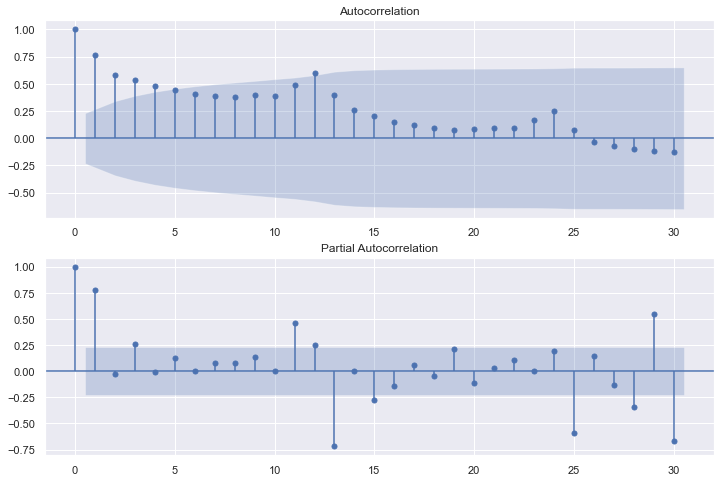

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_whiskyy['interest'],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_whiskyy['interest'],lags=30,ax=ax2)

In [33]:
## For non seasonal data
## p=1, d=0, q=4 
from statsmodels.tsa.arima_model import ARIMA

# ARIMA (Whisky)

In [34]:
model=ARIMA(df_whiskyy['interest'],order=(1,0,4))
model_fit=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [35]:
model_fit.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               interest   No. Observations:                   72
Model:                     ARMA(1, 4)   Log Likelihood                -291.476
Method:                       css-mle   S.D. of innovations             13.551
Date:                Wed, 09 Nov 2022   AIC                            596.952
Time:                        10:27:58   BIC                            612.889
Sample:                    01-01-2010   HQIC                           603.296
                         - 12-01-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             90.4342        nan        nan        nan         nan         nan
ar.L1.interest     1.0000      0.002    444.145      0.000       0.996       1.004
ma.L1.interest    -0.3698      0.001   -553.983      0.000      -0.371      -0.368
ma.L2.interest    -0.0269        nan        nan        nan         nan         nan
ma.L3.interest     0.1935        nan        nan        nan         nan         nan
ma.L4.interest    -0.7969        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            0.1659           -1.0605j            1.0734           -0.2253
MA.3            0.1659           +1.0605j            1.0734            0.2253
MA.4           -1.0890           -0.0000j            1.0890           -0.5000
-----------------------------------------------------------------------------
"""

In [36]:
## the features which have P>|z| less han 0.05 that have positive impact on time lag which we are goin to predict.  

<AxesSubplot:xlabel='Date'>

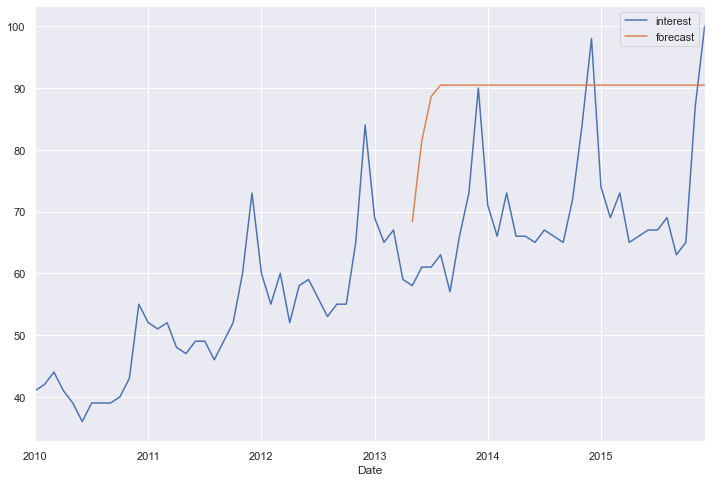

In [37]:
df_whiskyy['forecast']=model_fit.predict(start=40,end=72,dynamic=True)
df_whiskyy[['interest','forecast']].plot(figsize=(12,8))

In [38]:
## Here the prediction is coming not correct because it is a seasonal data it will not look well with the ARIMA model.

# SARIMA (Whisky)

In [39]:
model=sm.tsa.statespace.SARIMAX(df_whiskyy['interest'],order=(1, 0, 4),seasonal_order=(1,0,4,12))
results=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: Us

<AxesSubplot:xlabel='Date'>

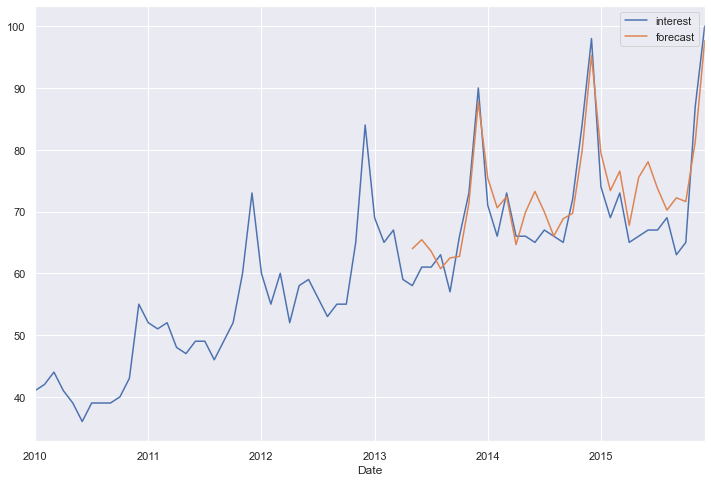

In [40]:
df_whiskyy['forecast']=results.predict(start=40,end=72,dynamic=True)
df_whiskyy[['interest','forecast']].plot(figsize=(12,8))

In [41]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_whiskyy.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [42]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_whiskyy.columns)

In [43]:
future_datest_df.tail()

,interest,forecast
2017-07-01,NaN,NaN
2017-08-01,NaN,NaN
2017-09-01,NaN,NaN
2017-10-01,NaN,NaN
2017-11-01,NaN,NaN


In [44]:
future_df_w=pd.concat([df_whiskyy,future_datest_df])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

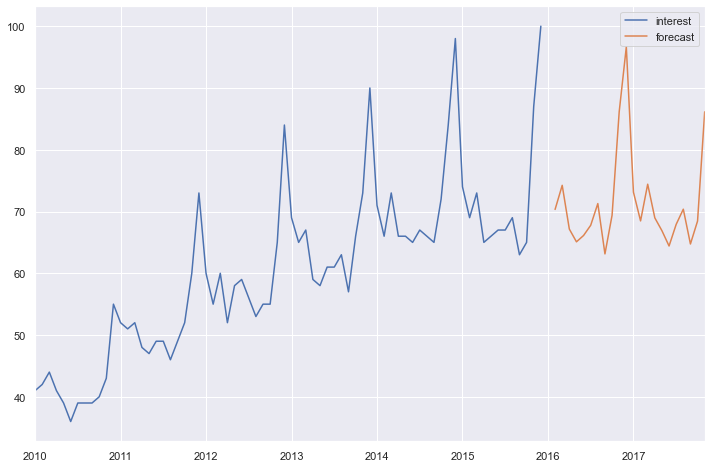

In [45]:
future_df_w['forecast'] = results.predict(start = 73, end = 97, dynamic= True)  
future_df_w[['interest', 'forecast']].plot(figsize=(12, 8)) 

In [46]:
future_df_w.tail(20)

,interest,forecast
2016-04-01,NaN,67.154534
2016-05-01,NaN,65.091754
2016-06-01,NaN,66.119493
2016-07-01,NaN,67.769540
2016-08-01,NaN,71.281842
2016-09-01,NaN,63.137554
2016-10-01,NaN,69.393593
2016-11-01,NaN,86.139687
2016-12-01,NaN,96.651434
2017-01-01,NaN,73.131046


In [47]:
df_whiskyy

,interest,forecast
Date,,
2010-01-01,41,NaN
2010-02-01,42,NaN
2010-03-01,44,NaN
2010-04-01,41,NaN
2010-05-01,39,NaN
...,...,...
2015-08-01,69,70.225284
2015-09-01,63,72.218605
2015-10-01,65,71.609862


In [48]:
df_whiskyy['Difference']= df_whiskyy['interest']-df_whiskyy['forecast' ]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual of Whisky')

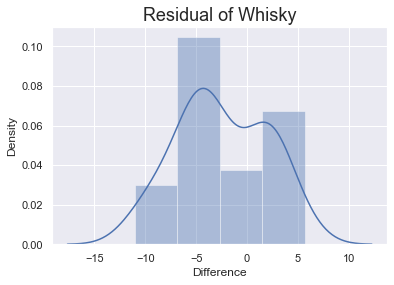

In [49]:
sns.distplot(df_whiskyy['Difference'])
plt.title('Residual of Whisky', size=18)

In [50]:
df_whiskyy

,interest,forecast,Difference
Date,,,
2010-01-01,41,NaN,NaN
2010-02-01,42,NaN,NaN
2010-03-01,44,NaN,NaN
2010-04-01,41,NaN,NaN
2010-05-01,39,NaN,NaN
...,...,...,...
2015-08-01,69,70.225284,-1.225284
2015-09-01,63,72.218605,-9.218605
2015-10-01,65,71.609862,-6.609862


## Fbprophet (Whisky)

In [51]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [52]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [53]:
df_whiskyy_pro = pd.read_csv('Whisky.csv')
df_whitewine_pr = pd.read_csv('Whitewine.csv')
df_craftbeer_pr = pd.read_csv('CraftBeer.csv')

In [54]:
df_whiskyy_pro['Date'] = pd.to_datetime(df_whiskyy_pro[['Year', 'Month']].assign(DAY=1))
df_whiskyy_pro.drop(['Year','Month'], axis=1, inplace= True)
df_whiskyy_pro


,Relative Interest,Date
0,41,2010-01-01
1,42,2010-02-01
2,44,2010-03-01
3,41,2010-04-01
4,39,2010-05-01
...,...,...
67,69,2015-08-01
68,63,2015-09-01
69,65,2015-10-01
70,87,2015-11-01


In [55]:
titles =list(df_whiskyy_pro.columns)
titles

['Relative Interest', 'Date']

In [56]:
titles[0], titles[1]= titles[1], titles[0]
titles

['Date', 'Relative Interest']

In [57]:
df_whiskyy_pro = df_whiskyy_pro[titles]
df_whiskyy_pro

,Date,Relative Interest
0,2010-01-01,41
1,2010-02-01,42
2,2010-03-01,44
3,2010-04-01,41
4,2010-05-01,39
...,...,...
67,2015-08-01,69
68,2015-09-01,63
69,2015-10-01,65
70,2015-11-01,87


In [58]:
df_whiskyy_pro.columns = ['ds', 'y']
df_whiskyy_pro

,ds,y
0,2010-01-01,41
1,2010-02-01,42
2,2010-03-01,44
3,2010-04-01,41
4,2010-05-01,39
...,...,...
67,2015-08-01,69
68,2015-09-01,63
69,2015-10-01,65
70,2015-11-01,87


In [59]:
# iniialize the model
model_p =Prophet()

In [60]:
model_p.fit(df_whiskyy_pro)

10:28:10 - cmdstanpy - INFO - Chain [1] start processing
10:28:11 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
df_whiskyy_pro.tail()

,ds,y
67,2015-08-01,69
68,2015-09-01,63
69,2015-10-01,65
70,2015-11-01,87
71,2015-12-01,100


In [62]:
### Create future dates of 365 days
future_dates_p=model_p.make_future_dataframe(periods=365)

In [63]:
future_dates_p.tail()

,ds
432,2016-11-26
433,2016-11-27
434,2016-11-28
435,2016-11-29
436,2016-11-30


In [64]:
prediction=model_p.predict(future_dates_p)

In [65]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,39.051000,39.161544,46.872326,39.051000,39.051000,3.900580,3.900580,3.900580,3.900580,3.900580,3.900580,0.0,0.0,0.0,42.951580
1,2010-02-01,39.752869,36.357583,44.184786,39.752869,39.752869,0.264665,0.264665,0.264665,0.264665,0.264665,0.264665,0.0,0.0,0.0,40.017533
2,2010-03-01,40.386815,39.518205,47.388624,40.386815,40.386815,3.069769,3.069769,3.069769,3.069769,3.069769,3.069769,0.0,0.0,0.0,43.456584
3,2010-04-01,41.088683,33.742285,41.422845,41.088683,41.088683,-3.636953,-3.636953,-3.636953,-3.636953,-3.636953,-3.636953,0.0,0.0,0.0,37.451730
4,2010-05-01,41.767911,34.447183,41.752213,41.767911,41.767911,-3.901317,-3.901317,-3.901317,-3.901317,-3.901317,-3.901317,0.0,0.0,0.0,37.866594


In [66]:
prediction.tail(120)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
317,2016-08-03,78.304349,66.709121,74.435950,78.135304,78.475929,-7.717850,-7.717850,-7.717850,-7.717850,-7.717850,-7.717850,0.0,0.0,0.0,70.586500
318,2016-08-04,78.315342,65.869992,73.292994,78.145819,78.486837,-8.805878,-8.805878,-8.805878,-8.805878,-8.805878,-8.805878,0.0,0.0,0.0,69.509464
319,2016-08-05,78.326335,64.662584,72.151639,78.155921,78.497745,-9.882272,-9.882272,-9.882272,-9.882272,-9.882272,-9.882272,0.0,0.0,0.0,68.444063
320,2016-08-06,78.337328,63.707754,71.105883,78.165507,78.508653,-10.934303,-10.934303,-10.934303,-10.934303,-10.934303,-10.934303,0.0,0.0,0.0,67.403025
321,2016-08-07,78.348320,62.478007,70.132615,78.175728,78.520150,-11.949585,-11.949585,-11.949585,-11.949585,-11.949585,-11.949585,0.0,0.0,0.0,66.398735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2016-11-26,79.568523,79.913766,87.960016,79.248441,79.872401,4.361952,4.361952,4.361952,4.361952,4.361952,4.361952,0.0,0.0,0.0,83.930475
433,2016-11-27,79.579516,84.300951,91.778146,79.257972,79.884969,8.499931,8.499931,8.499931,8.499931,8.499931,8.499931,0.0,0.0,0.0,88.079446
434,2016-11-28,79.590509,87.963872,95.913647,79.267502,79.897488,12.334391,12.334391,12.334391,12.334391,12.334391,12.334391,0.0,0.0,0.0,91.924899
435,2016-11-29,79.601501,91.483876,99.309929,79.276361,79.909952,15.798198,15.798198,15.798198,15.798198,15.798198,15.798198,0.0,0.0,0.0,95.399699


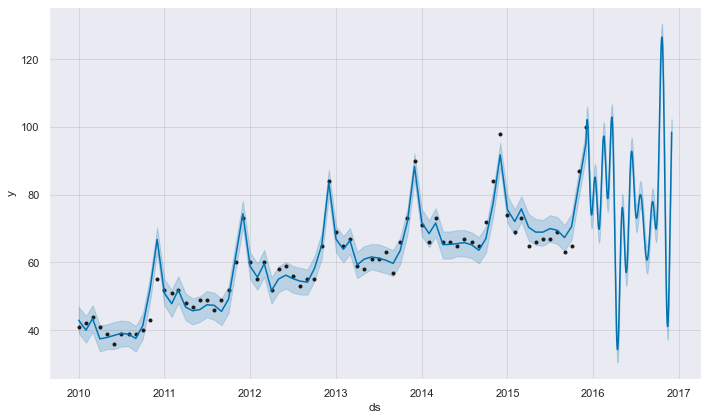

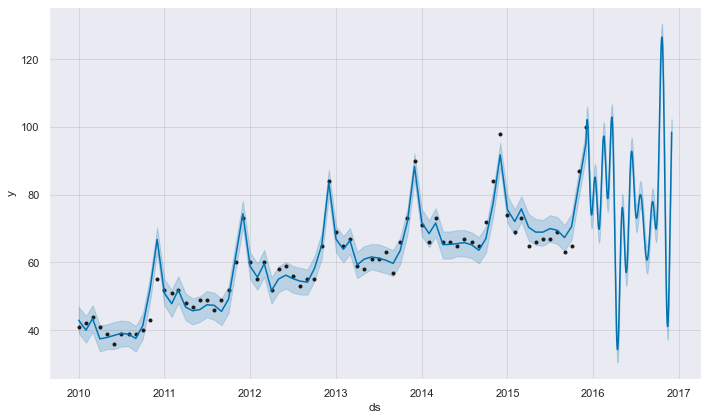

In [67]:
### plot the predicted projection
model_p.plot(prediction)
# the dot par is the real data
# the blue line is a predicted data
# the blue space is the trend space 
# and the last line without dots is the future prediction

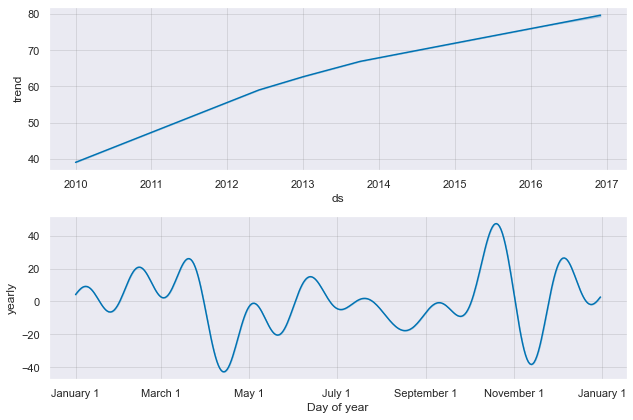

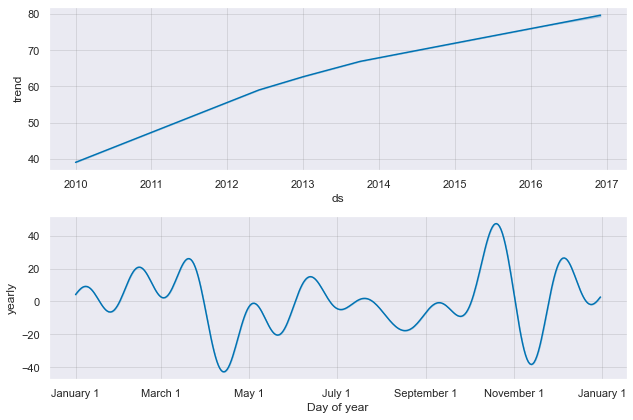

In [68]:
#### Visualize Each Components[Trends,yearly]
model_p.plot_components(prediction)

In [69]:
df_whiskyy_pro.head()

,ds,y
0,2010-01-01,41
1,2010-02-01,42
2,2010-03-01,44
3,2010-04-01,41
4,2010-05-01,39


In [70]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model_p, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/6 [00:00<?, ?it/s]

10:28:17 - cmdstanpy - INFO - Chain [1] start processing
10:28:17 - cmdstanpy - INFO - Chain [1] done processing
10:28:18 - cmdstanpy - INFO - Chain [1] start processing
10:28:19 - cmdstanpy - INFO - Chain [1] done processing
10:28:20 - cmdstanpy - INFO - Chain [1] start processing
10:28:20 - cmdstanpy - INFO - Chain [1] done processing
10:28:21 - cmdstanpy - INFO - Chain [1] start processing
10:28:22 - cmdstanpy - INFO - Chain [1] done processing
10:28:23 - cmdstanpy - INFO - Chain [1] start processing
10:28:23 - cmdstanpy - INFO - Chain [1] done processing
10:28:24 - cmdstanpy - INFO - Chain [1] start processing
10:28:26 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-07-01,57.183338,55.399166,58.981873,56,2012-06-14
1,2012-08-01,65.775062,63.866919,67.555650,53,2012-06-14
2,2012-09-01,63.432504,61.557045,65.221801,55,2012-06-14
3,2012-10-01,64.192857,62.408053,66.072220,55,2012-06-14
4,2012-11-01,60.139965,58.311618,62.014591,65,2012-06-14


C:\Users\hp\anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\hp\anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


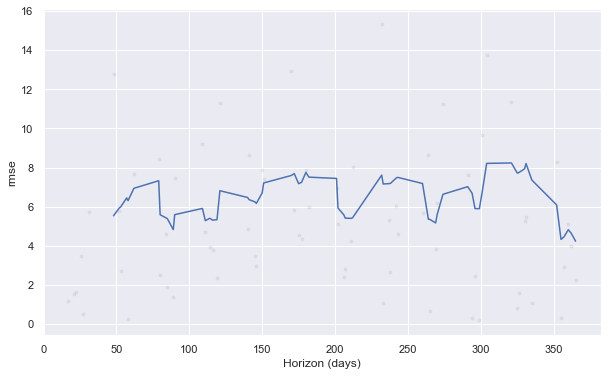

In [71]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# 5) Whitewine Analysis

In [72]:
df_whitewine

,Relative Interest
Date,
2010-01-01,54
2010-02-01,54
2010-03-01,58
2010-04-01,52
2010-05-01,61
...,...
2015-08-01,81
2015-09-01,72
2015-10-01,70


In [73]:
df_whitewine.isnull().sum()

Relative Interest    0
dtype: int64

In [74]:
df_whitewine.columns=['interest']

In [75]:
adfuller_test(df_whitewine['interest'])

ADF Test Statistic : -1.6200197800081997
p-value : 0.4727189280306774
#Lags Used : 12
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Our data is non stationary, we have to make it stationary so we will use differencing
# Differencing (Whitewine)

In [76]:
df_whitewine['Seasonal First Difference']=df_whitewine['interest']-df_whitewine['interest'].shift(12)

In [77]:
df_whitewine.head(20)

,interest,Seasonal First Difference
Date,,
2010-01-01,54,NaN
2010-02-01,54,NaN
2010-03-01,58,NaN
2010-04-01,52,NaN
2010-05-01,61,NaN
2010-06-01,59,NaN
2010-07-01,67,NaN
2010-08-01,64,NaN
2010-09-01,56,NaN


In [78]:
## Again test dickey fuller test
adfuller_test(df_whitewine['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.8842281737386153
p-value : 0.0472130265528692
#Lags Used : 1
Number of Observations Used : 58
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

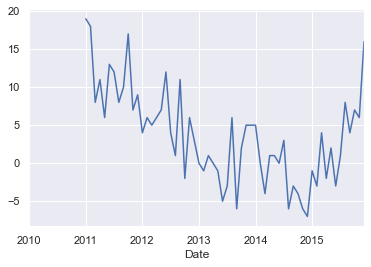

In [79]:
df_whitewine['Seasonal First Difference'].plot()

## Now our data is stationary 
# Plotting ACF and PACF plots

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


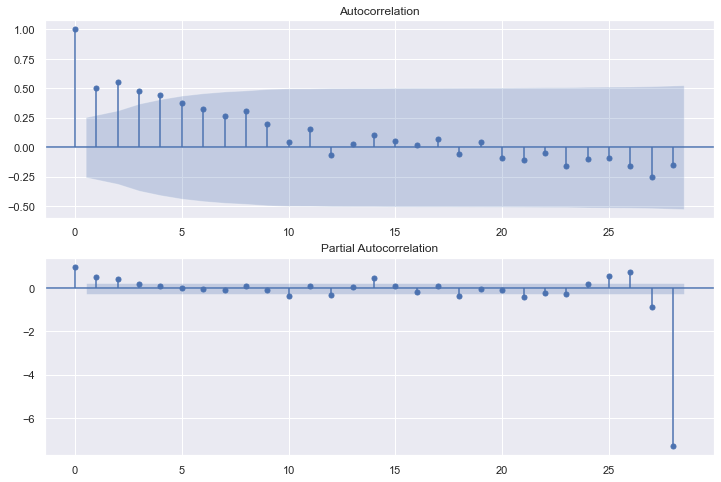

In [80]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_whitewine['Seasonal First Difference'].iloc[13:],lags=28,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_whitewine['Seasonal First Difference'].iloc[13:],lags=28,ax=ax2)

In [81]:
# For non-seasonal data
#p=2, d=1, q=4 
from statsmodels.tsa.arima_model import ARIMA

# ARIMA ( White Wine)

In [82]:
model_2=ARIMA(df_whitewine['interest'],order=(2,1,4))
model_2_fit=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [83]:
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           interest   No. Observations:                   72
Model:             SARIMAX(1, 0, 4)x(1, 0, 4, 12)   Log Likelihood                -199.309
Date:                            Wed, 09 Nov 2022   AIC                            420.617
Time:                                    10:28:37   BIC                            445.661
Sample:                                01-01-2010   HQIC                           430.587
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9947      0.010     98.447      0.000       0.975       1.015
ma.L1         -0.4853      0.118     -4.097      0.000      -0.717      -0.253
ma.L2         -0.2516      0.185     -1.361      0.173      -0.614       0.111
ma.L3         -0.1281      0.206     -0.622      0.534      -0.532       0.276
ma.L4          0.0971      0.118      0.823      0.411      -0.134       0.328
ar.S.L12       0.8426      0.230      3.667      0.000       0.392       1.293
ma.S.L12      -0.1854      5.002     -0.037      0.970      -9.988       9.617
ma.S.L24       0.2671      8.034      0.033      0.973     -15.478      16.012
ma.S.L36       0.7644      8.764      0.087      0.930     -16.413      17.942
ma.S.L48      -0.1139      0.777     -0.146      0.884      -1.638       1.410
sigma2         6.4773     74.065      0.087      0.930    -138.687     151.642
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.98   Prob(JB):                         0.42
Heteroskedasticity (H):               1.21   Skew:                             0.38
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

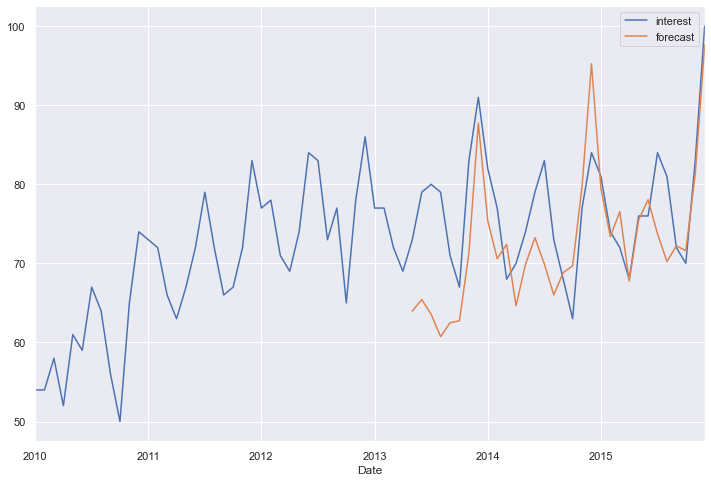

In [84]:
df_whitewine['forecast']=results.predict(start=40,end=72,dynamic=True)
df_whitewine[['interest','forecast']].plot(figsize=(12,8))

# SARIMA (White Wine)

In [85]:
model=sm.tsa.statespace.SARIMAX(df_whitewine['interest'],order=(2, 1, 4),seasonal_order=(2,1,4,12))
results=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: Us

<AxesSubplot:xlabel='Date'>

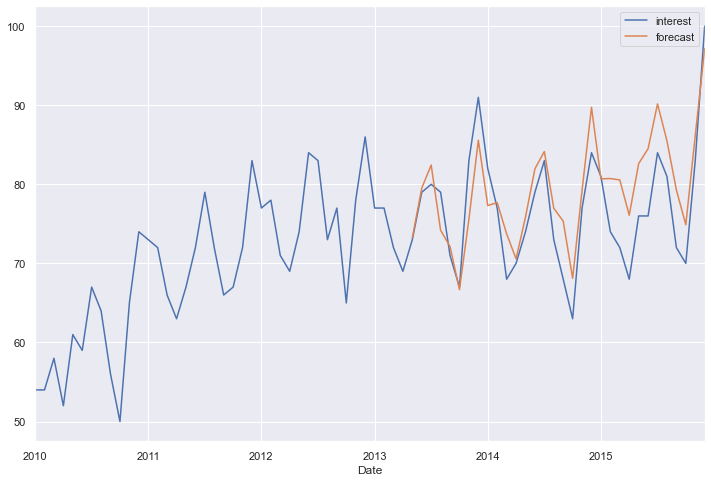

In [86]:
df_whitewine['forecast']=results.predict(start=40,end=72,dynamic=True)
df_whitewine[['interest','forecast']].plot(figsize=(12,8))

In [87]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_whitewine.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [88]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_whitewine.columns)

In [89]:
future_datest_df.tail()

,interest,Seasonal First Difference,forecast
2017-07-01,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN


In [90]:
future_df=pd.concat([df_whitewine,future_datest_df])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

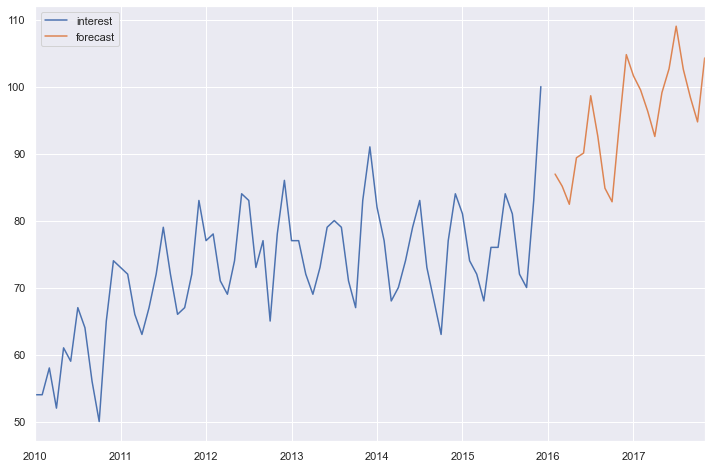

In [91]:
future_df['forecast'] = results.predict(start = 73, end = 97, dynamic= True)  
future_df[['interest', 'forecast']].plot(figsize=(12, 8)) 

In [92]:
future_df.tail(20)

,interest,Seasonal First Difference,forecast
2016-04-01,NaN,NaN,82.432016
2016-05-01,NaN,NaN,89.374442
2016-06-01,NaN,NaN,90.077605
2016-07-01,NaN,NaN,98.632398
2016-08-01,NaN,NaN,92.567186
2016-09-01,NaN,NaN,84.829508
2016-10-01,NaN,NaN,82.803493
2016-11-01,NaN,NaN,94.148904
2016-12-01,NaN,NaN,104.770475
2017-01-01,NaN,NaN,101.607869


In [93]:
df_whitewine.head(45)

,interest,Seasonal First Difference,forecast
Date,,,
2010-01-01,54,NaN,NaN
2010-02-01,54,NaN,NaN
2010-03-01,58,NaN,NaN
2010-04-01,52,NaN,NaN
2010-05-01,61,NaN,NaN
2010-06-01,59,NaN,NaN
2010-07-01,67,NaN,NaN
2010-08-01,64,NaN,NaN
2010-09-01,56,NaN,NaN


In [94]:
df_whitewine['Difference']= df_whitewine['interest']-df_whitewine['forecast' ]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual of White Wine')

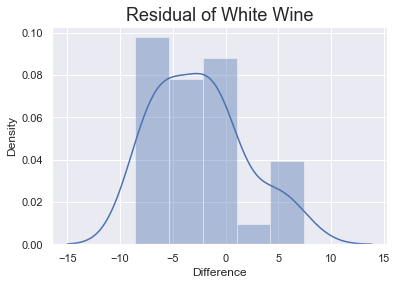

In [95]:
sns.distplot(df_whitewine['Difference'])
plt.title('Residual of White Wine', size=18)

# Fb Prophet (Whitewine)

In [96]:
df_whitewine_pr['Date'] = pd.to_datetime(df_whitewine_pr[['Year', 'Month']].assign(DAY=1))
df_whitewine_pr.drop(['Year','Month'], axis=1, inplace= True)
df_whitewine_pr


,Relative Interest,Date
0,54,2010-01-01
1,54,2010-02-01
2,58,2010-03-01
3,52,2010-04-01
4,61,2010-05-01
...,...,...
67,81,2015-08-01
68,72,2015-09-01
69,70,2015-10-01
70,83,2015-11-01


In [97]:
titles_w =list(df_whitewine_pr.columns)
titles_w

['Relative Interest', 'Date']

In [98]:
titles_w[0], titles_w[1]= titles_w[1], titles_w[0]
titles_w

['Date', 'Relative Interest']

In [99]:
df_whitewine_pr = df_whitewine_pr[titles_w]
df_whitewine_pr

,Date,Relative Interest
0,2010-01-01,54
1,2010-02-01,54
2,2010-03-01,58
3,2010-04-01,52
4,2010-05-01,61
...,...,...
67,2015-08-01,81
68,2015-09-01,72
69,2015-10-01,70
70,2015-11-01,83


In [100]:
df_whitewine_pr.columns = ['ds', 'y']
df_whitewine_pr

,ds,y
0,2010-01-01,54
1,2010-02-01,54
2,2010-03-01,58
3,2010-04-01,52
4,2010-05-01,61
...,...,...
67,2015-08-01,81
68,2015-09-01,72
69,2015-10-01,70
70,2015-11-01,83


In [101]:
# iniialize the model
model_w =Prophet()

In [102]:
model_w.fit(df_whitewine_pr)

10:28:53 - cmdstanpy - INFO - Chain [1] start processing
10:28:54 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
df_whitewine_pr.tail()

,ds,y
67,2015-08-01,81
68,2015-09-01,72
69,2015-10-01,70
70,2015-11-01,83
71,2015-12-01,100


In [104]:
### Create future dates of 365 days
future_dates_w=model_w.make_future_dataframe(periods=365)

In [105]:
future_dates_w.tail()

,ds
432,2016-11-26
433,2016-11-27
434,2016-11-28
435,2016-11-29
436,2016-11-30


In [106]:
prediction_w=model_w.predict(future_dates_w)

In [107]:
prediction_w.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,55.598000,56.090074,62.455844,55.598000,55.598000,3.572918,3.572918,3.572918,3.572918,3.572918,3.572918,0.0,0.0,0.0,59.170918
1,2010-02-01,56.424912,54.395822,60.842305,56.424912,56.424912,1.260345,1.260345,1.260345,1.260345,1.260345,1.260345,0.0,0.0,0.0,57.685257
2,2010-03-01,57.171800,50.622249,57.165020,57.171800,57.171800,-3.172028,-3.172028,-3.172028,-3.172028,-3.172028,-3.172028,0.0,0.0,0.0,53.999772
3,2010-04-01,57.998713,48.593368,54.879030,57.998713,57.998713,-6.229980,-6.229980,-6.229980,-6.229980,-6.229980,-6.229980,0.0,0.0,0.0,51.768732
4,2010-05-01,58.798950,54.868981,61.242117,58.798950,58.798950,-0.785016,-0.785016,-0.785016,-0.785016,-0.785016,-0.785016,0.0,0.0,0.0,58.013934


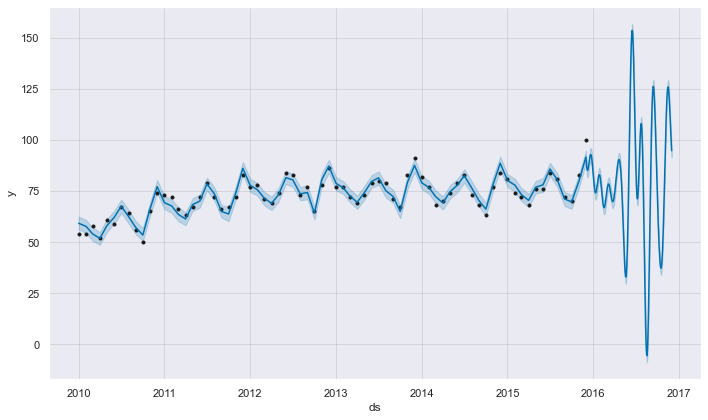

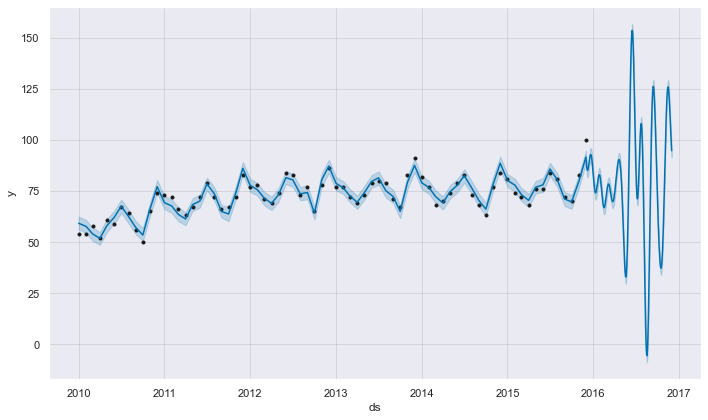

In [108]:
### plot the predicted projection
model_w.plot(prediction_w)
# the dot par is the real data
# the blue line is a predicted data
# the blue space is the trend space 
# and the last line without dots is the future prediction

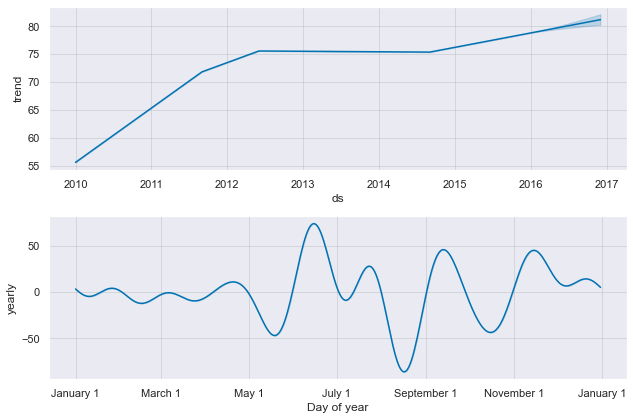

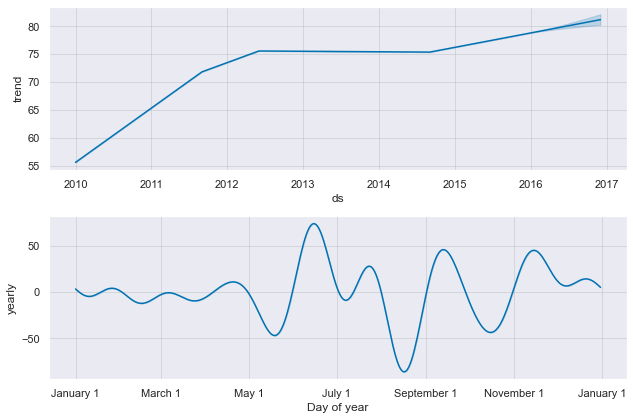

In [109]:
#### Visualize Each Components[Trends,yearly]
model_w.plot_components(prediction_w)

In [110]:
df_whitewine_pr.head()

,ds,y
0,2010-01-01,54
1,2010-02-01,54
2,2010-03-01,58
3,2010-04-01,52
4,2010-05-01,61


In [111]:
from prophet.diagnostics import cross_validation
df_cv_w = cross_validation(model_w, initial='730 days', period='180 days', horizon = '365 days')
df_cv_w.head()

  0%|          | 0/6 [00:00<?, ?it/s]

10:29:00 - cmdstanpy - INFO - Chain [1] start processing
10:29:00 - cmdstanpy - INFO - Chain [1] done processing
10:29:01 - cmdstanpy - INFO - Chain [1] start processing
10:29:02 - cmdstanpy - INFO - Chain [1] done processing
10:29:03 - cmdstanpy - INFO - Chain [1] start processing
10:29:04 - cmdstanpy - INFO - Chain [1] done processing
10:29:05 - cmdstanpy - INFO - Chain [1] start processing
10:29:06 - cmdstanpy - INFO - Chain [1] done processing
10:29:07 - cmdstanpy - INFO - Chain [1] start processing
10:29:07 - cmdstanpy - INFO - Chain [1] done processing
10:29:08 - cmdstanpy - INFO - Chain [1] start processing
10:29:09 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-07-01,82.378267,80.165415,84.478306,83,2012-06-14
1,2012-08-01,85.760118,83.633708,87.946752,73,2012-06-14
2,2012-09-01,73.672318,71.588877,75.717780,77,2012-06-14
3,2012-10-01,53.817580,51.757744,55.926129,65,2012-06-14
4,2012-11-01,89.695754,87.615603,91.846060,78,2012-06-14


In [112]:
from prophet.diagnostics import performance_metrics
df_w = performance_metrics(df_cv_w)
df_w.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,48 days,31.382308,5.601991,3.909830,0.051255,0.026314,0.048873,0.571429
1,52 days,33.855860,5.818579,4.422055,0.057991,0.034955,0.055397,0.428571
2,53 days,31.651706,5.625985,4.224872,0.055200,0.034955,0.053346,0.428571
3,57 days,32.011727,5.657891,4.300799,0.056332,0.034955,0.054445,0.285714
4,58 days,35.628557,5.968966,4.788707,0.063445,0.054640,0.061136,0.142857


C:\Users\hp\anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\hp\anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


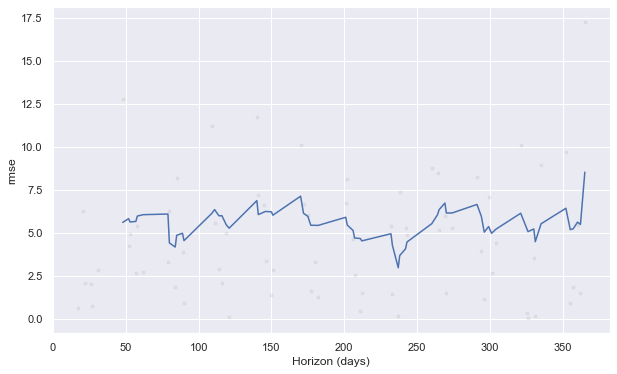

In [113]:
from prophet.plot import plot_cross_validation_metric
fig_w = plot_cross_validation_metric(df_cv_w, metric='rmse')

# 6) Craft Beer Analysis

In [114]:
df_craftbeer.columns=['interest']

In [115]:
df_craftbeer

,interest
Date,
2010-01-01,6
2010-02-01,9
2010-03-01,15
2010-04-01,12
2010-05-01,17
...,...
2015-08-01,84
2015-09-01,75
2015-10-01,66


In [116]:
df_craftbeer.isnull().sum()

interest    0
dtype: int64

In [117]:
adfuller_test(df_craftbeer['interest'])

ADF Test Statistic : -0.016032165408745996
p-value : 0.9571859840134869
#Lags Used : 12
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Our data is non stationary, we have to make it stationary so we will use differencing
# Differencing (Craft Beer)

In [118]:
df_craftbeer['Seasonal First Difference']=df_craftbeer['interest']-df_craftbeer['interest'].shift(12)

In [119]:
df_craftbeer

,interest,Seasonal First Difference
Date,,
2010-01-01,6,NaN
2010-02-01,9,NaN
2010-03-01,15,NaN
2010-04-01,12,NaN
2010-05-01,17,NaN
...,...,...
2015-08-01,84,14.0
2015-09-01,75,4.0
2015-10-01,66,-3.0


In [120]:
## Again test dickey fuller test
adfuller_test(df_craftbeer['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.674412141746856
p-value : 9.397693723215271e-05
#Lags Used : 0
Number of Observations Used : 59
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

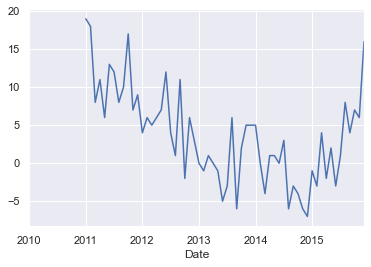

In [121]:
df_whitewine['Seasonal First Difference'].plot()

## Now our data is stationary 
# Plotting ACF and PACF plots

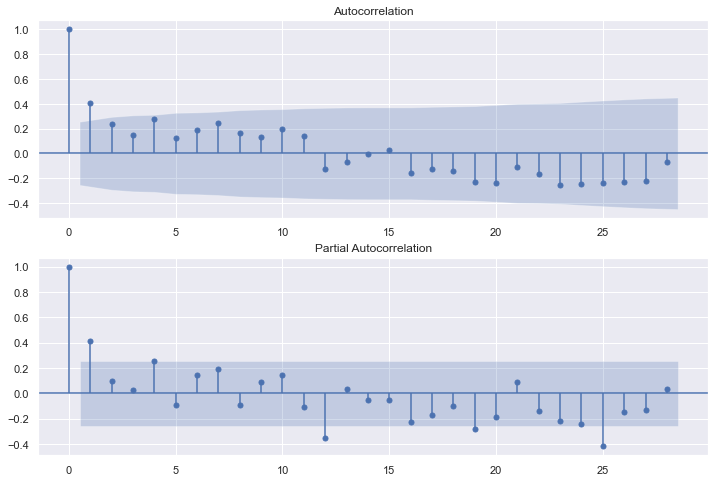

In [122]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_craftbeer['Seasonal First Difference'].iloc[13:],lags=28,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_craftbeer['Seasonal First Difference'].iloc[13:],lags=28,ax=ax2)

In [123]:
# For non-seasonal data
#p=1, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA

In [124]:
model_3=ARIMA(df_craftbeer['interest'],order=(1,1,1))
model_3_fit=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [125]:
model_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           interest   No. Observations:                   72
Model:             SARIMAX(2, 1, 4)x(2, 1, 4, 12)   Log Likelihood                -163.025
Date:                            Wed, 09 Nov 2022   AIC                            352.051
Time:                                    10:29:23   BIC                            379.059
Sample:                                01-01-2010   HQIC                           362.594
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0592      0.650      0.091      0.927      -1.216       1.334
ar.L2          0.7666      0.525      1.461      0.144      -0.262       1.795
ma.L1         -0.6670      1.375     -0.485      0.627      -3.361       2.027
ma.L2         -0.7917      2.039     -0.388      0.698      -4.789       3.205
ma.L3          0.7147      0.963      0.742      0.458      -1.172       2.601
ma.L4         -0.1085      0.279     -0.389      0.698      -0.656       0.439
ar.S.L12       0.7537     46.793      0.016      0.987     -90.959      92.466
ar.S.L24      -0.7500     20.218     -0.037      0.970     -40.377      38.877
ma.S.L12      -1.7295     71.769     -0.024      0.981    -142.395     138.936
ma.S.L24       1.8490     60.201      0.031      0.975    -116.143     119.841
ma.S.L36      -1.5074    163.563     -0.009      0.993    -322.084     319.070
ma.S.L48       0.4880     36.887      0.013      0.989     -71.810      72.786
sigma2         7.1049   1100.057      0.006      0.995   -2148.968    2163.178
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.96   Prob(JB):                         0.56
Heteroskedasticity (H):               0.43   Skew:                             0.32
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

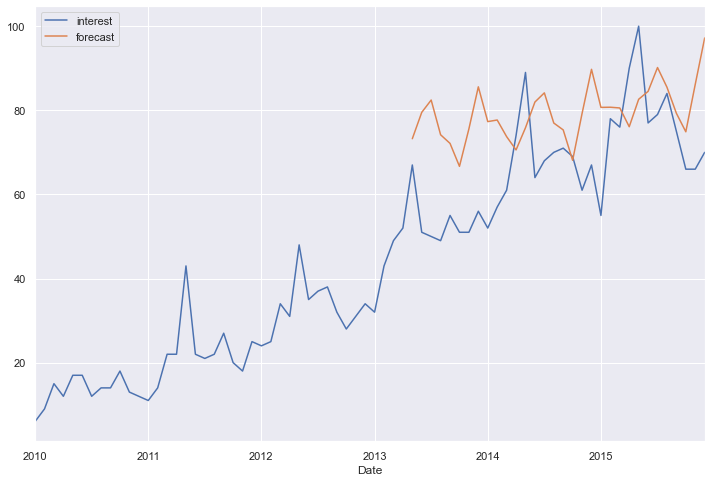

In [126]:
df_craftbeer['forecast']=results.predict(start=40,end=72,dynamic=True)
df_craftbeer[['interest','forecast']].plot(figsize=(12,8))

# SARIMA (Craft Beer)

In [127]:
model=sm.tsa.statespace.SARIMAX(df_craftbeer['interest'],order=(2, 1, 4),seasonal_order=(2,1,4,12))
results=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

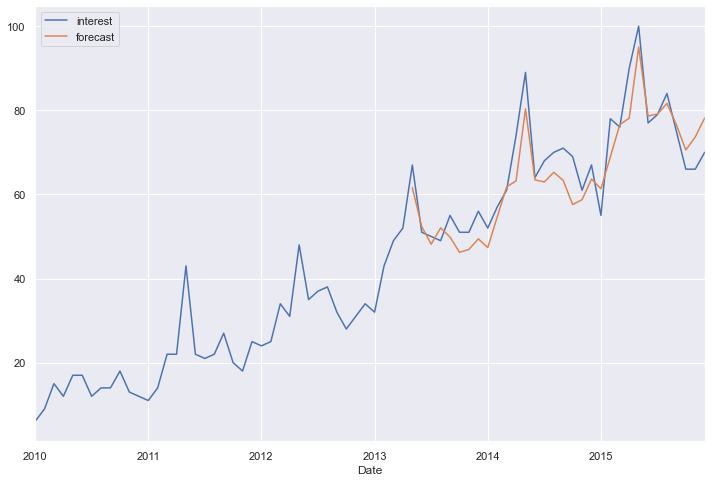

In [128]:
df_craftbeer['forecast']=results.predict(start=40,end=72,dynamic=True)
df_craftbeer[['interest','forecast']].plot(figsize=(12,8))

In [129]:
from pandas.tseries.offsets import DateOffset
future_dates_craftbeer=[df_craftbeer.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [130]:
future_datest_craftbeer_df=pd.DataFrame(index=future_dates[1:],columns=df_craftbeer.columns)

In [131]:
future_datest_craftbeer_df.tail()

,interest,Seasonal First Difference,forecast
2017-07-01,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN


In [132]:
future_df_craftbeer=pd.concat([df_craftbeer,future_datest_craftbeer_df])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

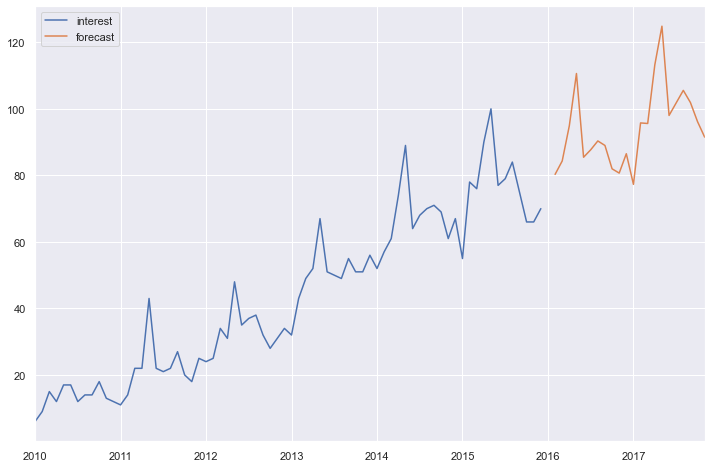

In [133]:
future_df_craftbeer['forecast'] = results.predict(start = 73, end = 97, dynamic= True)  
future_df_craftbeer[['interest', 'forecast']].plot(figsize=(12, 8)) 

In [134]:
future_df_craftbeer.tail(20)

,interest,Seasonal First Difference,forecast
2016-04-01,NaN,NaN,94.928415
2016-05-01,NaN,NaN,110.625622
2016-06-01,NaN,NaN,85.458495
2016-07-01,NaN,NaN,87.692532
2016-08-01,NaN,NaN,90.350872
2016-09-01,NaN,NaN,88.995145
2016-10-01,NaN,NaN,81.974584
2016-11-01,NaN,NaN,80.692164
2016-12-01,NaN,NaN,86.509464
2017-01-01,NaN,NaN,77.307080


In [135]:
df_craftbeer.head(45)

,interest,Seasonal First Difference,forecast
Date,,,
2010-01-01,6,NaN,NaN
2010-02-01,9,NaN,NaN
2010-03-01,15,NaN,NaN
2010-04-01,12,NaN,NaN
2010-05-01,17,NaN,NaN
2010-06-01,17,NaN,NaN
2010-07-01,12,NaN,NaN
2010-08-01,14,NaN,NaN
2010-09-01,14,NaN,NaN


In [136]:
df_craftbeer['Difference']= df_craftbeer['interest']-df_craftbeer['forecast' ]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual of Craft Beer')

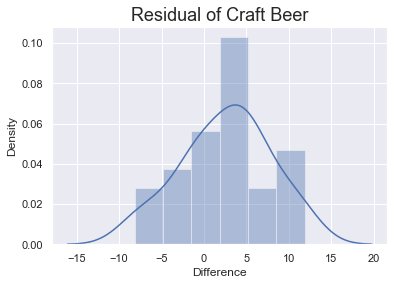

In [137]:
sns.distplot(df_craftbeer['Difference'])
plt.title('Residual of Craft Beer', size=18)

# Fb Prophet (Craft Beer)

In [138]:
df_craftbeer_pr['Date'] = pd.to_datetime(df_craftbeer_pr[['Year', 'Month']].assign(DAY=1))
df_craftbeer_pr.drop(['Year','Month'], axis=1, inplace= True)
df_craftbeer_pr


,Relative Interest,Date
0,6,2010-01-01
1,9,2010-02-01
2,15,2010-03-01
3,12,2010-04-01
4,17,2010-05-01
...,...,...
67,84,2015-08-01
68,75,2015-09-01
69,66,2015-10-01
70,66,2015-11-01


In [139]:
titles_c =list(df_craftbeer_pr.columns)
titles_c

['Relative Interest', 'Date']

In [140]:
titles_c[0], titles_c[1]= titles_c[1], titles_c[0]
titles_c

['Date', 'Relative Interest']

In [141]:
df_craftbeer_pr = df_craftbeer_pr[titles_c]
df_craftbeer_pr

,Date,Relative Interest
0,2010-01-01,6
1,2010-02-01,9
2,2010-03-01,15
3,2010-04-01,12
4,2010-05-01,17
...,...,...
67,2015-08-01,84
68,2015-09-01,75
69,2015-10-01,66
70,2015-11-01,66


In [142]:
df_craftbeer_pr.columns = ['ds', 'y']
df_craftbeer_pr

,ds,y
0,2010-01-01,6
1,2010-02-01,9
2,2010-03-01,15
3,2010-04-01,12
4,2010-05-01,17
...,...,...
67,2015-08-01,84
68,2015-09-01,75
69,2015-10-01,66
70,2015-11-01,66


In [143]:
# iniialize the model
model_c =Prophet()

In [144]:
model_c.fit(df_craftbeer_pr)

10:29:40 - cmdstanpy - INFO - Chain [1] start processing
10:29:40 - cmdstanpy - INFO - Chain [1] done processing


In [145]:
### Create future dates of 365 days
future_dates_c=model_c.make_future_dataframe(periods=365)

In [146]:
future_dates_c.tail()

,ds
432,2016-11-26
433,2016-11-27
434,2016-11-28
435,2016-11-29
436,2016-11-30


In [147]:
prediction_c=model_c.predict(future_dates_c)

In [148]:
prediction_c.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,5.770430,-7.817661,3.755113,5.770430,5.770430,-7.792301,-7.792301,-7.792301,-7.792301,-7.792301,-7.792301,0.0,0.0,0.0,-2.021871
1,2010-02-01,6.786045,0.574239,12.219903,6.786045,6.786045,-0.349635,-0.349635,-0.349635,-0.349635,-0.349635,-0.349635,0.0,0.0,0.0,6.436410
2,2010-03-01,7.703374,4.820903,16.354029,7.703374,7.703374,3.098531,3.098531,3.098531,3.098531,3.098531,3.098531,0.0,0.0,0.0,10.801905
3,2010-04-01,8.718988,9.872417,21.004198,8.718988,8.718988,6.435876,6.435876,6.435876,6.435876,6.435876,6.435876,0.0,0.0,0.0,15.154865
4,2010-05-01,9.701841,23.046841,34.201881,9.701841,9.701841,19.082949,19.082949,19.082949,19.082949,19.082949,19.082949,0.0,0.0,0.0,28.784791


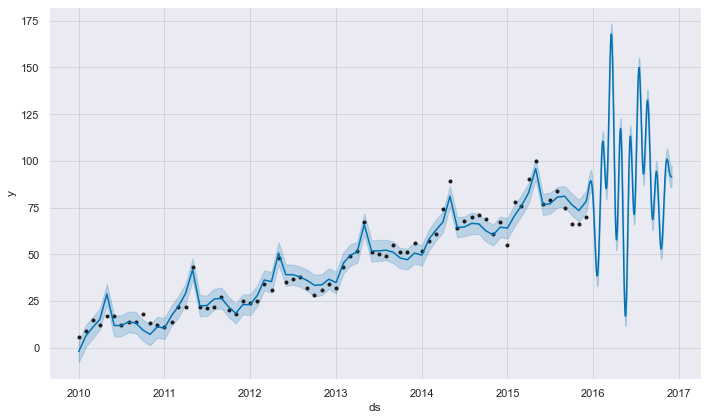

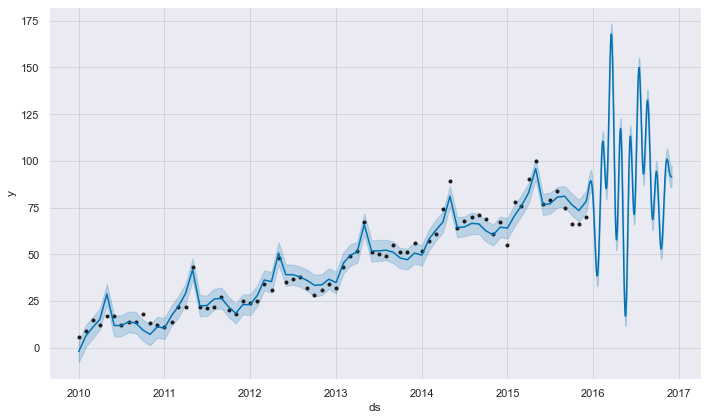

In [149]:
### plot the predicted projection
model_c.plot(prediction_c)
# the dot par is the real data
# the blue line is a predicted data
# the blue space is the trend space 
# and the last line without dots is the future prediction

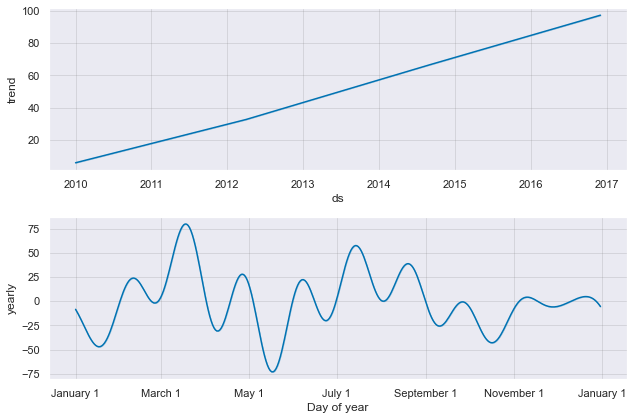

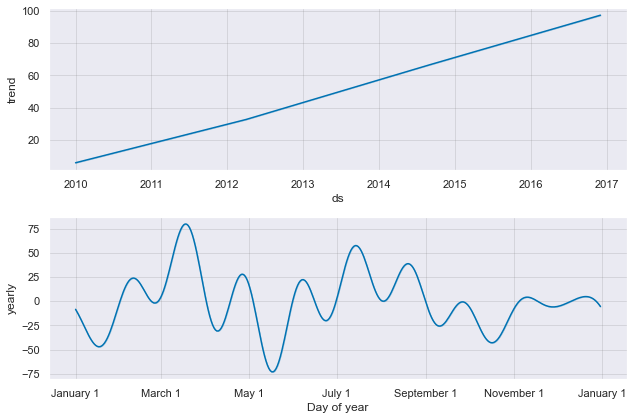

In [150]:
#### Visualize Each Components[Trends,yearly]
model_c.plot_components(prediction_c)

In [151]:
from prophet.diagnostics import cross_validation
df_cv_c = cross_validation(model_c, initial='730 days', period='180 days', horizon = '365 days')
df_cv_c.head()

  0%|          | 0/6 [00:00<?, ?it/s]

10:29:47 - cmdstanpy - INFO - Chain [1] start processing
10:29:47 - cmdstanpy - INFO - Chain [1] done processing
10:29:49 - cmdstanpy - INFO - Chain [1] start processing
10:29:49 - cmdstanpy - INFO - Chain [1] done processing
10:29:51 - cmdstanpy - INFO - Chain [1] start processing
10:29:51 - cmdstanpy - INFO - Chain [1] done processing
10:29:53 - cmdstanpy - INFO - Chain [1] start processing
10:29:54 - cmdstanpy - INFO - Chain [1] done processing
10:29:55 - cmdstanpy - INFO - Chain [1] start processing
10:29:56 - cmdstanpy - INFO - Chain [1] done processing
10:29:57 - cmdstanpy - INFO - Chain [1] start processing
10:29:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-07-01,31.391784,28.378169,34.708947,37,2012-06-14
1,2012-08-01,34.314547,31.028102,37.512877,38,2012-06-14
2,2012-09-01,22.584251,19.245678,25.626793,32,2012-06-14
3,2012-10-01,47.264891,43.881341,50.386125,28,2012-06-14
4,2012-11-01,36.463828,33.279269,39.693173,31,2012-06-14


In [152]:
from prophet.diagnostics import performance_metrics
df_c = performance_metrics(df_cv_c)
df_c.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,48 days,40.824192,6.389381,4.454222,0.098841,0.096986,0.096073,0.428571
1,52 days,38.889446,6.236140,4.257603,0.091248,0.096986,0.087431,0.428571
2,53 days,37.294098,6.106889,3.826597,0.077249,0.043955,0.074177,0.571429
3,57 days,36.981199,6.081217,3.744741,0.075041,0.028505,0.071771,0.571429
4,58 days,37.335402,6.110270,3.908689,0.077026,0.028505,0.073803,0.571429


C:\Users\hp\anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\hp\anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


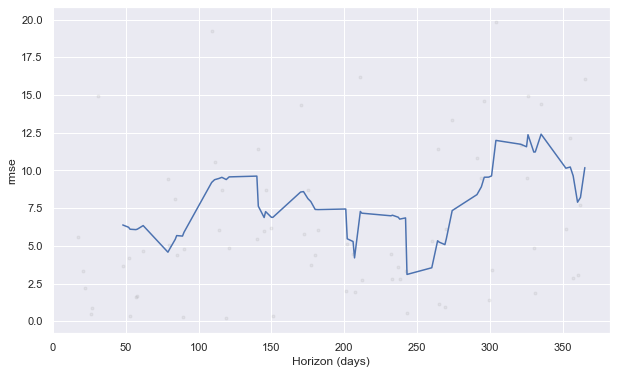

In [153]:
from prophet.plot import plot_cross_validation_metric
fig_c = plot_cross_validation_metric(df_cv_c, metric='rmse')

# 7) Employees Working hours 

In [154]:
chris = pd.read_csv('chris.csv')
cynthia = pd.read_csv('cynthia.csv')
nicola = pd.read_csv('nicola.csv')
raj = pd.read_csv('raj.csv')
stephenie = pd.read_csv('stephenie.csv')

In [155]:
chris.head()

,Month,Available hours,Actual hours
0,January,168,152
1,Feburary,160,157
2,March,176,176
3,April,176,170
4,May,160,171


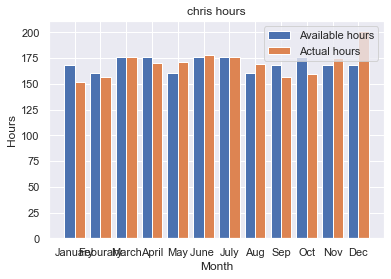

In [156]:
width = 0.4
values=np.arange(len(chris['Month']))
plt.bar(values, chris['Available hours'], width,label ='Available hours')
plt.bar(values+width, chris['Actual hours'], width,label ='Actual hours')
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend()
plt.xticks(values+0.2,chris['Month'] )
plt.title("chris hours")
plt.show()

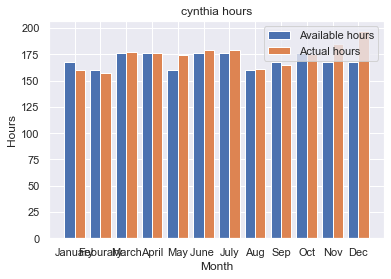

In [157]:
width = 0.4
values=np.arange(len(cynthia['Month']))
plt.bar(values, cynthia['Available hours'], width,label ='Available hours')
plt.bar(values+width, cynthia['Actual hours'], width,label ='Actual hours')
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend()
plt.xticks(values+0.2,chris['Month'] )
plt.title("cynthia hours")
plt.show()

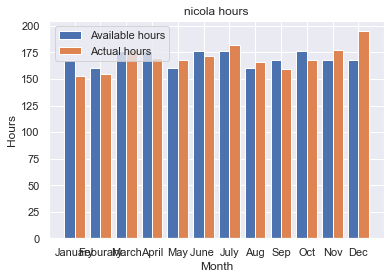

In [158]:
width = 0.4
values=np.arange(len(nicola['Month']))
plt.bar(values, nicola['Available hours'], width,label ='Available hours')
plt.bar(values+width, nicola['Actual hours'], width,label ='Actual hours')
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend()
plt.xticks(values+0.2,chris['Month'] )
plt.title("nicola hours")
plt.show()

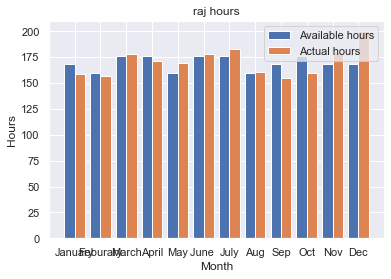

In [160]:
width = 0.4
values=np.arange(len(nicola['Month']))
plt.bar(values, raj['Available hours'], width,label ='Available hours')
plt.bar(values+width, raj['Actual hours'], width,label ='Actual hours')
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend()
plt.xticks(values+0.2,chris['Month'] )
plt.title("raj hours")
plt.show()

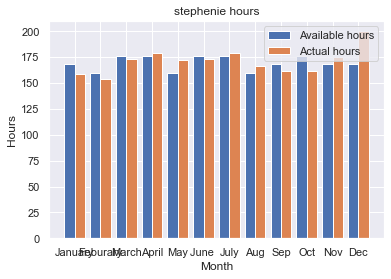

In [161]:
width = 0.4
values=np.arange(len(nicola['Month']))
plt.bar(values, stephenie['Available hours'], width,label ='Available hours')
plt.bar(values+width, stephenie['Actual hours'], width,label ='Actual hours')
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend()
plt.xticks(values+0.2,chris['Month'] )
plt.title("stephenie hours")
plt.show()